**CNN on CIFAR10 DataSet**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [18]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [20]:
print(x_train[50])

[[[ 16  76  74]
  [ 17  77  75]
  [ 17  77  75]
  ...
  [ 62 106  87]
  [ 55  99  80]
  [ 51  94  75]]

 [[ 16  76  74]
  [ 16  76  74]
  [ 15  75  74]
  ...
  [ 62 109  84]
  [ 58 105  80]
  [ 52 100  75]]

 [[ 16  76  74]
  [ 15  75  73]
  [ 15  75  73]
  ...
  [ 57 110  79]
  [ 59 111  80]
  [ 56 109  78]]

 ...

 [[ 96 110 138]
  [114 127 159]
  [119 132 167]
  ...
  [128 135 153]
  [120 130 145]
  [117 131 142]]

 [[118 132 159]
  [100 113 145]
  [114 126 163]
  ...
  [139 146 159]
  [131 140 153]
  [121 134 147]]

 [[144 148 173]
  [136 140 168]
  [105 114 143]
  ...
  [145 151 170]
  [137 144 163]
  [131 141 158]]]


In [21]:
#Normalization betwenn 0 to 1
x_train, x_test = x_train/255.0, x_test/255.0

In [22]:
print(x_train[50])

[[[0.0627451  0.29803922 0.29019608]
  [0.06666667 0.30196078 0.29411765]
  [0.06666667 0.30196078 0.29411765]
  ...
  [0.24313725 0.41568627 0.34117647]
  [0.21568627 0.38823529 0.31372549]
  [0.2        0.36862745 0.29411765]]

 [[0.0627451  0.29803922 0.29019608]
  [0.0627451  0.29803922 0.29019608]
  [0.05882353 0.29411765 0.29019608]
  ...
  [0.24313725 0.42745098 0.32941176]
  [0.22745098 0.41176471 0.31372549]
  [0.20392157 0.39215686 0.29411765]]

 [[0.0627451  0.29803922 0.29019608]
  [0.05882353 0.29411765 0.28627451]
  [0.05882353 0.29411765 0.28627451]
  ...
  [0.22352941 0.43137255 0.30980392]
  [0.23137255 0.43529412 0.31372549]
  [0.21960784 0.42745098 0.30588235]]

 ...

 [[0.37647059 0.43137255 0.54117647]
  [0.44705882 0.49803922 0.62352941]
  [0.46666667 0.51764706 0.65490196]
  ...
  [0.50196078 0.52941176 0.6       ]
  [0.47058824 0.50980392 0.56862745]
  [0.45882353 0.51372549 0.55686275]]

 [[0.4627451  0.51764706 0.62352941]
  [0.39215686 0.44313725 0.56862745]


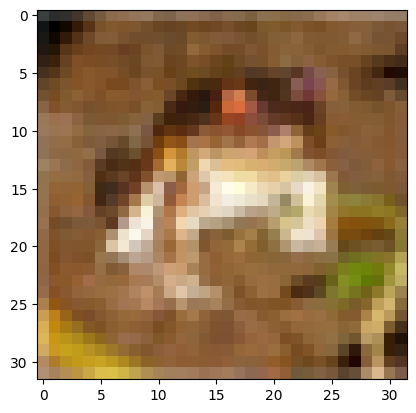

In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [24]:
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [25]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [26]:
#Build CNN Model
model = Sequential(
    [
        Dense(64, input_shape=(32,32,3)),
        Conv2D(64, kernel_size=(3,3), activation='relu'),
        Conv2D(64, kernel_size=(3,3), activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Conv2D(128, kernel_size=(3,3), activation='relu'),
        Conv2D(128, kernel_size=(3,3), activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.3),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

In [27]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='sgd')

In [28]:
train = model.fit(x_train,y_train,batch_size=32,verbose=1,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 27s 11ms/step - loss: 2.0208 - accuracy: 0.2602 - val_loss: 1.6813 - val_accuracy: 0.3955
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6026 - accuracy: 0.4217 - val_loss: 1.4372 - val_accuracy: 0.4867
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4300 - accuracy: 0.4856 - val_loss: 1.3255 - val_accuracy: 0.5211
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3076 - accuracy: 0.5332 - val_loss: 1.6591 - val_accuracy: 0.4463
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1990 - accuracy: 0.5759 - val_loss: 1.1589 - val_accuracy: 0.5871
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1096 - accuracy: 0.6082 - val_loss: 1.1025 - val_accuracy: 0.6084
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0311 - accuracy: 0.6415 - val_loss: 1.0006 -

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32, 32, 64)        256       
                                                                 
 conv2d_12 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 128)       147584    
                                                      

In [30]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.9566 - accuracy: 0.6701
0.9565983414649963
0.6700999736785889


In [31]:
#Make Predictions
arr = model.predict([x_train[0].reshape(1,32,32,3)])
print(arr)

1/1 [==============================] - 0s 499ms/step
[[2.2412383e-05 1.0798529e-05 1.0538925e-02 4.2845923e-02 7.2913864e-03
  7.7685453e-03 9.3044639e-01 1.0197663e-03 4.5265231e-05 1.0543594e-05]]


In [32]:
label=np.argmax(arr)
print(label)

6
